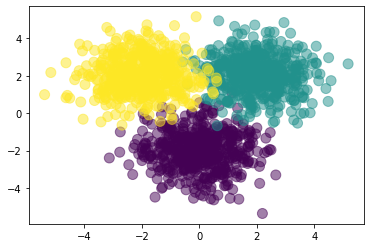

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500

X1 = np.random.randn(n, 2) + np.array([0, -2])
X2 = np.random.randn(n, 2) + np.array([2, 2])
X3 = np.random.randn(n, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*n + [1]*n + [2]*n)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

In [0]:
def sigmoid(X):
  return 1/(1 + np.exp(-X))

def softmax(y):
  ye = np.exp(y)
  ys = np.sum(ye, axis=1, keepdims=True)
  return ye/ys

def feedforward(X, W1, b1, W2, b2):
  Z = sigmoid(X.dot(W1) + b1)
  Y = softmax(Z.dot(W2) + b2)

  return Y, Z

def classification_rate(Y, P):
  n_correct = 0
  n_total = 0

  for i in range(len(Y)):
    n_total += 1

    if Y[i] == P[i]:
      n_correct += 1
    
  return n_correct/n_total

def cost(T, output):
  return np.sum(np.sum(T * np.log(output)))

def der_w2(Z, T, Y):
  return Z.T.dot(T-Y)

def der_b2(T, Y):
  return (T-Y).sum(axis=0)

def der_w1(X, Z, T, Y, W):
  return X.T.dot((T-Y).dot(W2.T)*Z*(1-Z))

def der_b1(T, Y, W2, Z):
  return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)

def backpropagation(lr, epochs, X, Y, W1, b1, W2, b2, T):
  costs = []
  nW1, nW2, nb1, nb2 = W1, W2, b1, b2
  for epoch in range(epochs):
    output, hidden = feedforward(X, nW1, nb1, nW2, nb2)

    if epoch%100 == 0:
      c = cost(T, output)
      P = np.argmax(output, axis=1)
      r = classification_rate(Y, P)
      print("cost: ", c, " classification rate: ", r)
      costs.append(c)

    #gradient ascent!
    nW2 += lr * der_w2(hidden, T, output)
    nb2 += lr * der_b2(T, output)
    nW1 += lr * der_w1(X, hidden, T, output, nW2)
    nb1 += lr * der_b1(T, output, nW2, hidden)

  plt.plot(costs)
  plt.show()

cost:  -2558.7307873280906  classification rate:  0.3333333333333333
cost:  -2422.4122731794623  classification rate:  0.3333333333333333
cost:  -2300.4842917509095  classification rate:  0.3333333333333333
cost:  -2191.8171576270347  classification rate:  0.3333333333333333
cost:  -2095.173418483121  classification rate:  0.3333333333333333
cost:  -2009.2766062319736  classification rate:  0.3333333333333333
cost:  -1932.8749561279883  classification rate:  0.3333333333333333
cost:  -1864.7928610457798  classification rate:  0.3333333333333333
cost:  -1803.9655536279147  classification rate:  0.3333333333333333
cost:  -1749.4557576914576  classification rate:  0.3333333333333333
cost:  -1700.4542077160268  classification rate:  0.3333333333333333
cost:  -1656.2684498283434  classification rate:  0.3333333333333333
cost:  -1616.305631346534  classification rate:  0.3333333333333333
cost:  -1580.0546451755226  classification rate:  0.3333333333333333
cost:  -1547.071186722375  classific

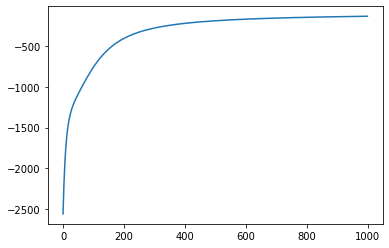

In [0]:
D = 2 #input-layer size
M = 3 #hidden-layer size
K = 3 #output-layer size
N = len(Y)

T = np.zeros((N, K))
for i in range(len(Y)):
  T[i, Y[i]] = 1

#initialize random weights and biases
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

backpropagation(10e-7, 100000, X, Y, W1, b1, W2, b2, T)